# Lecture 5: Decision Trees

(NOTE: Normalization is not required, when working with Decision Trees)

### Import Libraries

In [46]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

### Load the data

In [40]:
# Load the data
df = pd.read_csv('../datasets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Split the data

In [41]:
# Split the data
inputs = df.drop(columns=['species'])
targets = df['species']
targets

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Create the model

In [42]:
# Create the model
model = DecisionTreeClassifier(max_depth=3)
model.fit(inputs, targets)

DecisionTreeClassifier(max_depth=3)

### Visualize the tree

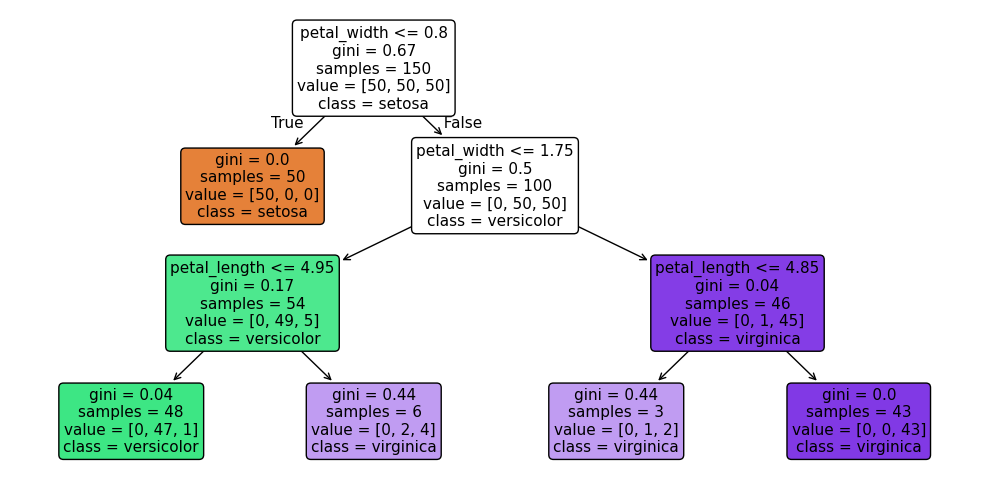

In [43]:
# Visualize the tree
plt.figure(figsize=(10,5))
plot_tree(model,
          feature_names=inputs.keys(),
          class_names=['setosa', 'versicolor', 'virginica'],
          filled=True,
          rounded=True,
          proportion=False,
          precision=2)

plt.tight_layout()
plt.show()

### Create predictions

In [45]:
# Create predictions
preds = model.predict(inputs)
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

### Create confusion matrix

In [47]:
# Create confusion matrix
confusion_matrix(targets, preds)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

### Print datafile head

In [54]:
# Print datafile head
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Create dummy variables

In [57]:
# Create dummy variables
dummy = pd.get_dummies(df['species'], dtype=int)

### Concatenate the dummy variables

In [58]:
# Concatenate the dummy variables
df = pd.concat([df, dummy], axis=1).drop(columns=['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### Create new model with ccp alpha

In [75]:
# Create new model with ccp_alpha=0 (ccp_alpha means complexity parameter used for Minimal Cost-Complexity Pruning)
# Minimal Cost-Complexity Pruning is used to avoid overfitting the model by pruning the tree to the optimal depth based on the ccp_alpha value provided
model = DecisionTreeClassifier(ccp_alpha=0)
model.fit(inputs, targets)

DecisionTreeClassifier(ccp_alpha=0)

### Visualize the tree

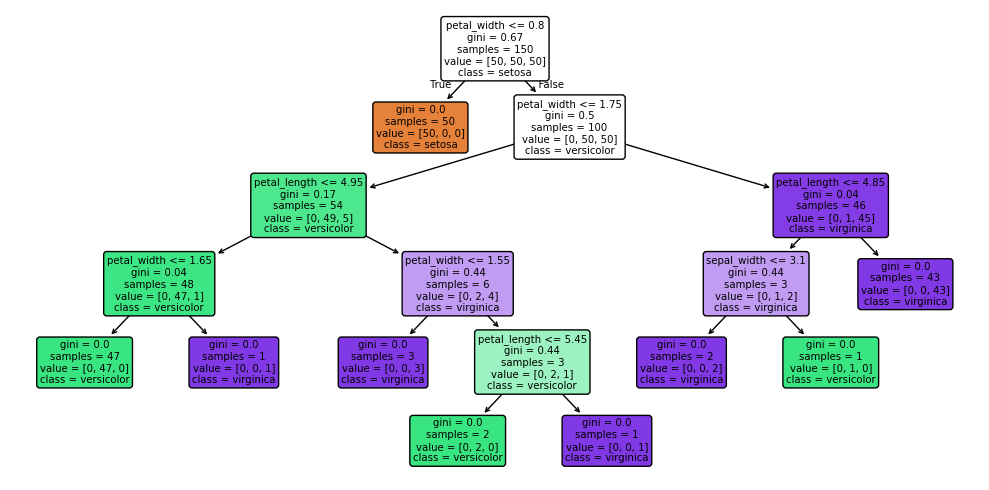

In [78]:
# Visualize the tree
plt.figure(figsize=(10,5))
plot_tree(model,
          feature_names=inputs.keys(), # feature_names is used to display the feature names in the tree
          class_names=['setosa', 'versicolor', 'virginica'], # class_names is used to display the class names in the tree
          filled=True, # filled is used to fill the nodes with colors
          rounded=True, # rounded is used to round the corners of the nodes
          proportion=False, # proportion is used to display the proportion of samples in each class
          precision=2) # precision is used to display the precision of the values in the tree

plt.tight_layout()
plt.show()